#MNIST
- 손으로 직접 쓴 흑백의 숫자
- data : 숫자이미지(28X28), 레이블(0~9)
- train data : 60,000개, test data : 10,000개

### dataset 다운

In [12]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train),(x_test,y_test) = load_data(path='mnist.npz')

### data 형태 확인

In [13]:
# 학습데이터
print(x_train.shape, y_train.shape)
print(y_train)
# 테스트데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


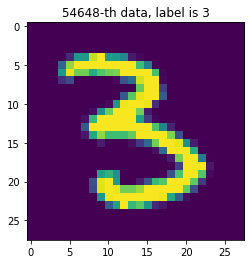

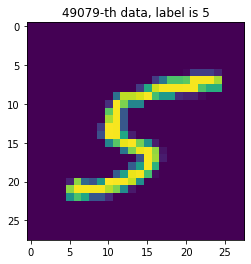

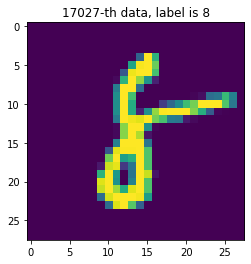

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 0~59999의 범위에서 세 개의 정수 뽑기
sample_size = 3
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx, label))

### validation data 만들기
[ sklearn 패키지 train_test_split() 함수]
- 데이터셋을 각 세트(학습, 검증,테스트)로 분리할 때 사용합니다
- 첫번째 두번째 인자에는 나눠줄 대상을 넣어줍니다
- test_size는 테스트셋의 비율
- random_state는 재생산성을 위해 사용합니다
  - 간혹 모델의 결과값을 출력했을 때, 매번 다른 값을 얻게 되는데, 이 경우에 학습데이터가 이전과 동일한지 확인해봐야합니다.
  - 데이터 구성과정에서 train_test_split()과 같은 함수를 사용하면 학습데이터가 이전과 동일한지 꼭 확인해야합니다.

In [15]:
from sklearn.model_selection import train_test_split

# train : val = 7 : 3
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)
print(f'train data : {x_train.shape}, label : {y_train.shape}')
print(f'validation data : {x_val.shape}, label : {y_val.shape}')

train data : (42000, 28, 28), label : (42000,)
validation data : (18000, 28, 28), label : (18000,)


### 데이터 전처리
- Dense층에 데이터를 입력하기 위해 2차원 배열로 이루어진 숫자 이미지 데이터를 1차원 배열로 변환해야 합니다.
- 28X28 형태의 데이터를 784차원의 1차원 배열로 변환
- 신경망은 입력 데이터의 스케일에 매우 민감하므로 적절한 전처리 과정이 필수입니다
  - gradient vanishing과 exploding으로 인해 학습이 진행 되지 않을 수 있기 때문입니다

In [27]:
x_train = x_train.reshape(x_train.shape[0], 28*28).astype('float32')
x_val = x_val.reshape(x_val.shape[0], 28*28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32')

# 숫자 이미지 데이터는 픽셀 값이 0~255 범위에 있기 떄문에 255로 나누어 0~1범위로 표준화(normalization)
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

print(x_train.shape)

(42000, 784)
